# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **16 октября в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` 
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sps
from warnings import filterwarnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from numpy import linalg as LA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings("ignore")

### Задача 1
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид $\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$. Найдите решение задачи в матричном виде.


## Решение

Для начала запишем уравнение в матричном виде:
$$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 = || W \left( Y -X\theta \right) ||^2 \to \min\limits_\theta$$
Где $W = diag(\sqrt{w_1}, \sqrt{w_2}, ..., \sqrt{w_n})$.

Возьмем производную по $\theta:$


$$\dfrac{\partial \left( \left( W \left( Y -X\theta \right)\right)^T W \left( Y -X\theta \right) \right) }{\partial \theta}= \dfrac{\partial \left( Y^T W^T W Y - 2 Y^T W^T W X \theta + \theta^T X^T W^T W X \theta  \right)}{\partial \theta} = - 2 Y^T W^T W X + \theta^T X^T W^T W = 0$$

Следовательно получаем

$$\theta = \left(X^T W^T W X \right)^{-1} X^T W^T W Y$$

**Ответ:** $\theta = \left(X^T W^T W X \right)^{-1} X^T W^T W Y$ 

### Задача 2*
Пусть $\widehat{\theta}$ &mdash; оценка коэффициентов линейной модели в методе ридж-регрессии.
* Посчитайте $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^T\left(\widehat{\theta} - \theta\right)$.
* Покажите, что в отличии от МНК вектор оценок отклика $\widehat{Y}$ на обучающей выборке в методе ридж-регрессии не перпендикулярен остаткам модели $\widehat{e} = Y  - \widehat{Y}$.


## Решение

Из лекции известно, что $\hat{\theta} = \left(X^T X + \lambda I_d  \right) X^T Y$ для рижд-регресии. Ещё известно, что $Y = X\theta + \epsilon$.

***Далее смотреть в pdf***

### Задача 3


Скачайте <a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">данные</a> о стоимости квартир в Москве.	Описание данных доступно по <a href="https://github.com/bdemeshev/em301/blob/master/datasets/flats_moscow_description.txt">ccылке</a>.
	
Обучите линейную регрессионную модель для предсказания цены квартиры от всех других параметров. Проверьте гипотезы о незначимости признаков и постройте доверительные интервалы для коэффициентов модели. Определите признаки желаемой для себя квартиры в Москве и постройте предсказательный интервал ее цены.

## Решение

Очевидно, что номер квартиры учитывать не стоит для регрессии. Уберем его сразу после загрусзи данных.

In [48]:
data = pd.read_csv('flats_moscow.txt', sep="\t")

data = data.iloc[:, 1:] # убираем нумерацию

data.head(7)

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,81,58,40,6.0,12.5,7,1,1,1,3
1,75,44,28,6.0,13.5,7,1,0,1,6
2,128,70,42,6.0,14.5,3,1,1,1,3
3,95,61,37,6.0,13.5,7,1,0,1,1
4,330,104,60,11.0,10.5,7,0,1,1,3
5,137,76,50,9.0,11.0,7,1,1,1,8
6,98,59,39,6.0,7.5,10,0,0,1,8


Мы хотим искать зависимость цены от всех признаков, значит price -- целевая переменная.

In [49]:
y, X = data['price'].to_numpy(), data.iloc[:, 1:] 
X = sm.add_constant(X, prepend=False)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

С помощью возможности библиотеки statsmodels обучим линейную регрессию.

In [51]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     399.3
Date:                Sat, 16 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:41:40   Log-Likelihood:                -7750.8
No. Observations:                1632   AIC:                         1.552e+04
Df Residuals:                    1622   BIC:                         1.558e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
totsp          1.5614      0.127     12.258      0.0

Как видим все признаки по отдельности значимы как и все признаки вместе. Также из таблицы видны доверительные интервалы и коэффиценты при признаках

Проверим, что алгоритм из statsmodel не переобучился

In [52]:
r2_score(y_test, res.predict(X_test))

0.6558448634979688

Что почти совпадает с результатом метрики $R^2$ линейной регрессии statsmodels. Скорее всего модель из statsmodels переобучена не сильно.

Остается найти вилку цен на квартиры желаемые для меня.

Так как думать о параметрах квартиры в Москве в которой я хотел бы жить пока не очень то и интересно, я просто напишу случайные числа описывающую квартиру согласно датасету(и не забуду про константный признак!)

In [53]:
X.to_numpy()[0]

array([58. , 40. ,  6. , 12.5,  7. ,  1. ,  1. ,  1. ,  3. ,  1. ])

In [55]:
x_my = [150., 110., 25., 15., 7., 1, 0., 0., 8., 1.]


In [56]:
res.get_prediction(x_my).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,323.923996,8.499308,307.253219,340.594773,266.467865,381.380127


In [57]:
print('Квартира с заданными параметрами в среднем будет стоить от ' + 
      str(res.get_prediction(x_my).summary_frame()['mean_ci_lower'].to_numpy()[0]) +
      ' до ' + str(res.get_prediction(x_my).summary_frame()['mean_ci_upper'].to_numpy()[0]) +
      '.\nА в среднем ' + str(res.get_prediction(x_my).summary_frame()['mean'].to_numpy()[0]) +'.')

Квартира с заданными параметрами в среднем будет стоить от 307.2532190469752 до 340.5947728299179.
А в среднем 323.9239959384465.


### Задача 4




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring">`Parkinsons telemonitoring`</a>. Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей. 

In [2]:
df = pd.read_table('parkinsons_updrs.data', sep=',')
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


**1.** Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков. 

Также обратите внимане, что в данных есть группы (паценты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [3]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [4]:
try:
    df = df.drop('motor_UPDRS', 1)
except:
    ''

y = df['total_UPDRS'].to_numpy()
X = df.drop(['subject#','total_UPDRS'], axis = 1).to_numpy()
groups = df['subject#'].to_numpy()

Разбейте данные на обучающую и тестирующие выборки в соотношении. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы. Реализуйте разделение на тренировочную и тестовую выборки с учетом того, чтобы разные пациенты попали в разные выборки. Выведите что-либо, подтверждающее данное свойство. Разделяйте выборку в отношении примерно 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [5]:
X_train = []
X_test = []
y_train = []
y_test = []
groups_test = []
groups_train = []

gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    groups_train, groups_test = groups[train], groups[test]

In [6]:
# Для проверки, что в тестовой и тренировочной выборках нет одинаковых людей 
# пересечём 2 массива groups_test и groups_test

print('Пересечение групп в тестовой и тренировочной выборках ' + str(np.intersect1d(groups_test, groups_train)))

Пересечение групп в тестовой и тренировочной выборках []


Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.


Это необходимо потому, что в регуляризации добавляется один общий для всех признаков параметр штрафующий модель за переобучение. Соответсвенно без стандартизации признаков может так выйти, что если признак имеет небольшие значения, но его параметр штрафа будет его штрафовать больше, чем признак, который на порядок больше по значениям.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [8]:
def draw_track(model, X, y, log_min, log_max, num, title='', l1_ratio=0, figsize=(12, 6)):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha', fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    #plt.legend(loc='best', fontsize=10)
    plt.axis('tight')
    plt.show()

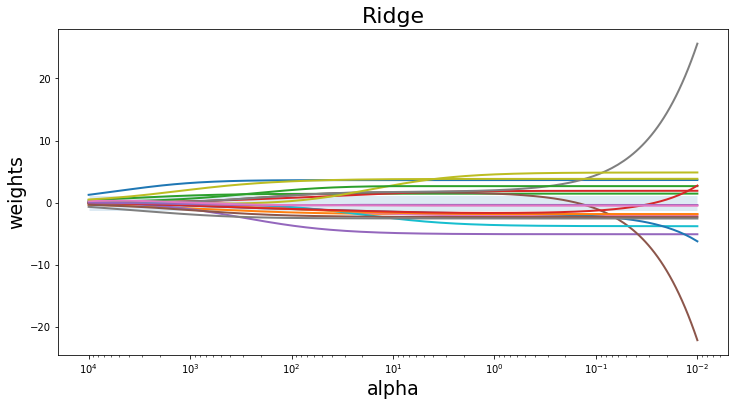

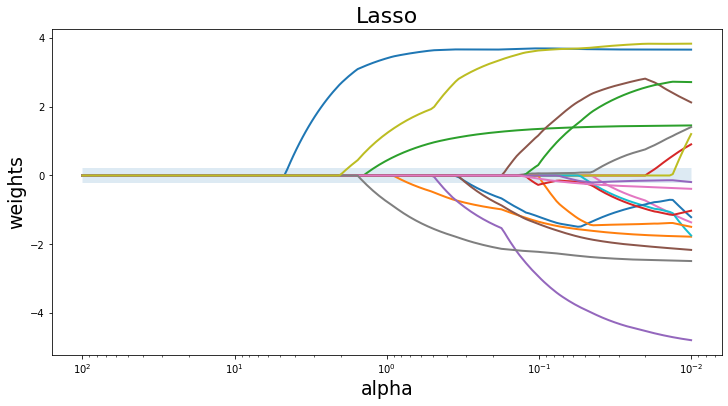

In [9]:
draw_track(Ridge(fit_intercept=True), X_train_scaled, y_train, -2, 4, 200, 
           title='Ridge')
draw_track(Lasso(fit_intercept=True), X_train_scaled, y_train, -2, 2, 200, 
           title='Lasso')

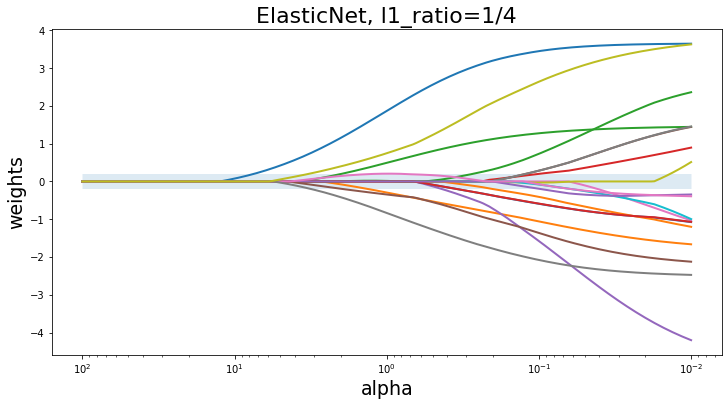

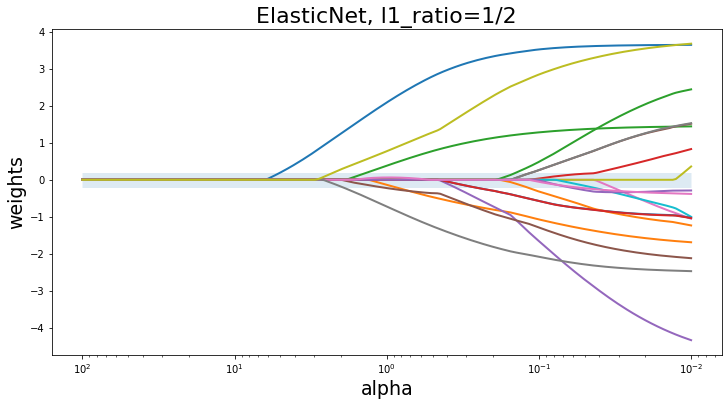

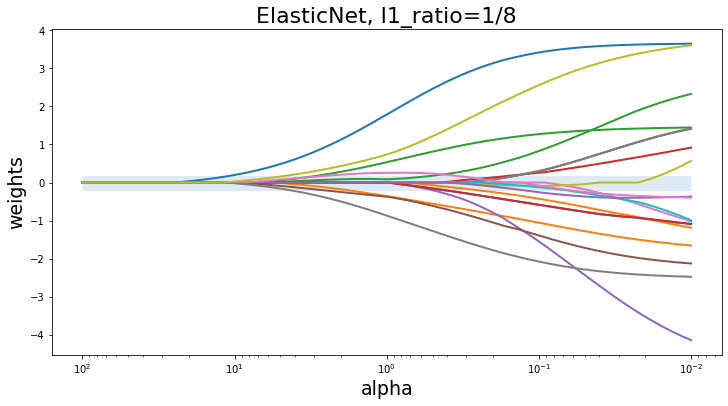

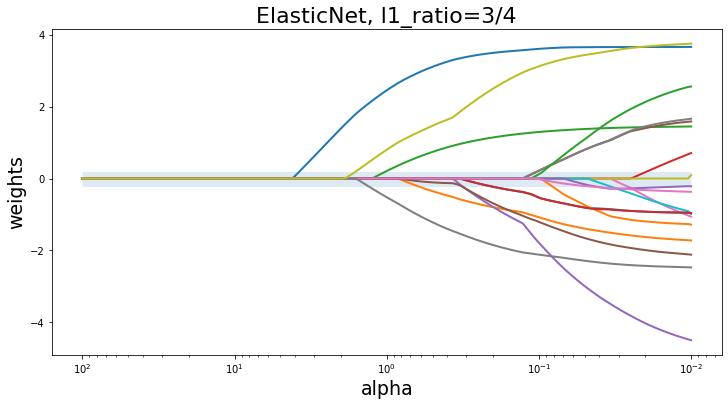

In [10]:
draw_track(ElasticNet(fit_intercept=True, l1_ratio=1/4), X_train_scaled, y_train, -2, 2, 200, 
           title='ElasticNet, l1_ratio=1/4')
draw_track(ElasticNet(fit_intercept=True, l1_ratio=2/4),  X_train_scaled, y_train, -2, 2, 200, 
           title='ElasticNet, l1_ratio=1/2')
draw_track(ElasticNet(fit_intercept=True, l1_ratio=1/8),  X_train_scaled, y_train, -2, 2, 200, 
           title='ElasticNet, l1_ratio=1/8')
draw_track(ElasticNet(fit_intercept=True, l1_ratio=3/4),  X_train_scaled, y_train, -2, 2, 200, 
           title='ElasticNet, l1_ratio=3/4')

 Не до конца понимаю как хорошо выбрать гиперпараметры по графикам, но для всех видов регрессий идеальный, на мой взгляд, параметр $\alpha$ равен 1. Если же говорить про l1_ratio, то я склоняюсь к 1/4 или 1/2, ибо наблюдается некоторый баланс между ridge и lasso.
    

Расчитайте индекс обусловленности для случая линейной регрессии. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [11]:
z = np.dot(X_train_scaled.T, X_train_scaled)
eig_nums = LA.eig(z)[0]
print("Число обусловленности для линейной регресии " + str(np.sqrt(eig_nums.max()/eig_nums.min())))

Число обусловленности для линейной регресии 25429.26616923287


Что >30, следовательно в данных есть мультиколлинеарность. Построим график индекса обусловленности от параметра регуляризации для Ridge-регрессиии.

In [12]:
def cond_num(lamb):
    tmp = []
    for l in lamb:
        nums = LA.eig(z + np.dot(l, np.identity(z.shape[0])))[0]
        tmp.append(np.sqrt(nums.max()/nums.min()))
    return np.array(tmp)

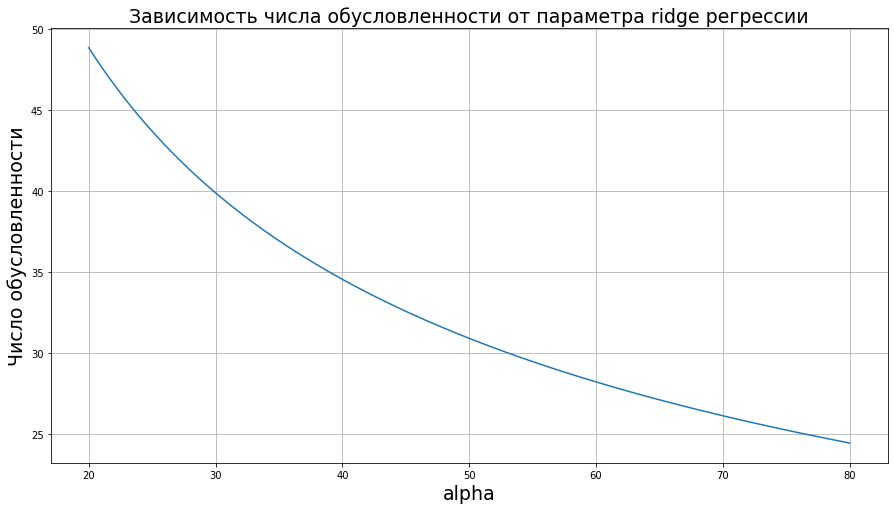

In [13]:
lamb = np.linspace(20,80,10000)

plt.figure(figsize=(15, 8))

plt.plot(lamb, cond_num(lamb))

plt.title('Зависимость числа обусловленности от параметра ridge регрессии', fontsize=19)
plt.xlabel('alpha', fontsize=19)
plt.ylabel('Число обусловленности', fontsize=19)
plt.grid()

plt.show()

**3.** С помощью кросс-валидации определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE). Подберите подходящую, на ваш взгляд, стратегию кросс-валидации.

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой.

При выполнении данного пункта вам может помочь метод `Pipeline()`. Он будет разобран на лекции, смотрите также ноутбук на `wiki`.

In [14]:
steps_Ridge = [
        ('scaler', StandardScaler()), 
        ('Ridge', Ridge(fit_intercept=True))
]

steps_Lasso = [
        ('scaler', StandardScaler()), 
        ('Lasso', Lasso(fit_intercept=True))
]

steps_Elastic = [
        ('scaler', StandardScaler()), 
        ('Elastic', ElasticNet(fit_intercept=True))
]

pipeline_Ridge = Pipeline(steps_Ridge) 
pipeline_Lasso = Pipeline(steps_Lasso)
pipeline_Elastic = Pipeline(steps_Elastic)

In [25]:
parameteres_Ridge = {
    'Ridge__alpha' : np.linspace(10**(-3), 10**4, num=100),
}

parameteres_Lasso = {
    'Lasso__alpha' : np.linspace(10**(-3), 10**3, num=100),
}

parameteres_Elastic = {
    'Elastic__alpha' : np.linspace(10**(-3), 10**3, num=100),
    'Elastic__l1_ratio' : np.linspace(10**(-3), 0.1, num=10)
}

In [26]:
gss = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


grid_Ridge = GridSearchCV(
        pipeline_Ridge, param_grid=parameteres_Ridge, cv=gss, scoring='neg_mean_squared_error'
)

grid_Lasso = GridSearchCV(
        pipeline_Lasso, param_grid=parameteres_Lasso, cv=gss, scoring='neg_mean_squared_error'
)

grid_Elastic = GridSearchCV(
        pipeline_Elastic, param_grid=parameteres_Elastic, cv=gss, scoring='neg_mean_squared_error'
)

In [ ]:
%%time
grid_Ridge.fit(X_train, y_train, groups=groups_train)

In [20]:
%%time
grid_Lasso.fit(X_train, y_train, groups=groups_train)

CPU times: user 34.6 s, sys: 44.3 s, total: 1min 18s
Wall time: 10.1 s


GridSearchCV(cv=GroupShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Lasso', Lasso())]),
             param_grid={'Lasso__alpha': array([1.00000e-03, 1.01020e+01, 2.02030e+01, 3.03040e+01, 4.04050e+01,
       5.05060e+01, 6.06070e+01, 7.07080e+01, 8.08090e+01, 9.09100e+01,
       1.01011e+02, 1.11112e+02, 1.21213...
       7.07071e+02, 7.17172e+02, 7.27273e+02, 7.37374e+02, 7.47475e+02,
       7.57576e+02, 7.67677e+02, 7.77778e+02, 7.87879e+02, 7.97980e+02,
       8.08081e+02, 8.18182e+02, 8.28283e+02, 8.38384e+02, 8.48485e+02,
       8.58586e+02, 8.68687e+02, 8.78788e+02, 8.88889e+02, 8.98990e+02,
       9.09091e+02, 9.19192e+02, 9.29293e+02, 9.39394e+02, 9.49495e+02,
       9.59596e+02, 9.69697e+02, 9.79798e+02, 9.89899e+02, 1.00000e+03])},
             scoring='neg_mean_squared_error')

In [21]:
%%time
grid_Elastic.fit(X_train, y_train, groups=groups_train)

CPU times: user 5min 55s, sys: 7min 37s, total: 13min 33s
Wall time: 1min 46s


GridSearchCV(cv=GroupShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Elastic', ElasticNet())]),
             param_grid={'Elastic__alpha': array([1.00000e-03, 1.01020e+01, 2.02030e+01, 3.03040e+01, 4.04050e+01,
       5.05060e+01, 6.06070e+01, 7.07080e+01, 8.08090e+01, 9.09100e+01,
       1.01011e+02, 1.11112e+0...
       8.08081e+02, 8.18182e+02, 8.28283e+02, 8.38384e+02, 8.48485e+02,
       8.58586e+02, 8.68687e+02, 8.78788e+02, 8.88889e+02, 8.98990e+02,
       9.09091e+02, 9.19192e+02, 9.29293e+02, 9.39394e+02, 9.49495e+02,
       9.59596e+02, 9.69697e+02, 9.79798e+02, 9.89899e+02, 1.00000e+03]),
                         'Elastic__l1_ratio': array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ])},
             scoring='neg_mean_squared_error')

In [23]:
print("Лучшие параметры для Ridge: ", grid_Ridge.best_params_)

print("Лучшие параметры для Lasso: ", grid_Lasso.best_params_)

print("Лучшие параметры для Elastic : ", grid_Elastic.best_params_)

Лучшие параметры для Ridge:  {'Ridge__alpha': 1000.0}
Лучшие параметры для Lasso:  {'Lasso__alpha': 10.102}
Лучшие параметры для Elastic :  {'Elastic__alpha': 10.102, 'Elastic__l1_ratio': 0.001}


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [24]:
print(f"Accuracy Ridge = {grid_Ridge.score(X_test, y_test):.2f}")

print(f"Accuracy Lasso = {grid_Lasso.score(X_test, y_test):.2f}")

print(f"Accuracy Elastic = {grid_Elastic.score(X_test, y_test):.2f}")

Accuracy Ridge = -108.07
Accuracy Lasso = -80.00
Accuracy Elastic = -75.84


Модель Elastic сработала лучше всех.

**4.** Исследуйте остатки модели Ridge-регрессии. Можно ли говорить о гомоскедастичности? Если нет, попытайтесь несложными преобразованиями признаков и отклика визуально прийти к гомоскедастичности. Если гетероскедастичность наблюдается для многих признаков, можете исследовать только два-три из них.

In [82]:
e = grid_Ridge.predict(X_test) - y_test
print("Breusch-Pagan test: p=%f" % sms.het_breuschpagan(e, X_test)[1])

print("Goldfeld-Quandt test: p=%f" % sms.het_goldfeldquandt(e, X_test)[1])

Breusch-Pagan test: p=0.000000
Goldfeld-Quandt test: p=0.000000


Остатки гомоскедастичные.

**5.** Сделайте общий вывод по задаче.

В большинстве случаев понять по графику какой гиперпараметр взять -- сложно. 